# HW8
## Poprawa wykresu z użyciem seaborn

Znaleziony wykres jest tu: [https://www.mdpi.com/1099-4300/22/12/1345/htm](https://www.mdpi.com/1099-4300/22/12/1345/htm)
Konkretniej chodzi o [ten](https://www.mdpi.com/entropy/entropy-22-01345/article_deploy/html/images/entropy-22-01345-g014.png) wykres. Wygląda on tak:
![title](https://www.mdpi.com/entropy/entropy-22-01345/article_deploy/html/images/entropy-22-01345-g014.png)



## Do poprawy jest...
Na pewno wykres nie powinien być trójwymiarowy, więc zamieniony został na wykres dwuwymiarowy. Ponadto sposób przedstawienia danych, jako wiele cienkich słupków, owszem, zwiększa dokładność, lecz jest mniej estetyczny niż bardziej ciągły wykres, szczególnie przy tak wolno zmieniających się danych, jak wyżej.

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import random

#### Najpierw generowane są dane

In [2]:
type1 = np.append(np.arange(10005, 6000, -267).tolist(), np.arange(6000, 3960, -24).tolist())
type2 = np.append([i**2 * 25 for i in range(0,10)], [random.uniform(-50, 50) + 2000 for i in range(1,91)]).round(1)
type3 = np.append([i**2 *2.8 for i in range(0,20)], [random.uniform(-50, 50) + 1000 for i in range(1,81)]).round(1)
type5 = np.arange(0,2500,25)
nom = np.arange(0, 100,1)

df = pd.DataFrame({
    "no" : nom,
    "type1" : type1,
    "type2" : type2,
    "type3" : type3,
    "type5" : type5
})
melted = pd.melt(df, 
                    id_vars=["no"], # Zmienne do zatrzymania
                    var_name="type") # Nazwa nowej zmiennej

In [3]:
df

,no,type1,type2,type3,type5
0,0,10005,0.0,0.0,0
1,1,9738,25.0,2.8,25
2,2,9471,100.0,11.2,50
3,3,9204,225.0,25.2,75
4,4,8937,400.0,44.8,100
...,...,...,...,...,...
95,95,4080,1969.4,975.2,2375
96,96,4056,2022.4,1003.1,2400
97,97,4032,1998.5,1035.5,2425
98,98,4008,1957.4,1003.9,2450


## Wykres po poprawie
Poprawiony wykres jest dwuwymiarowy, zamiast zbyt wielu cienkich słupków są ciągłe linie, ponadto osie rozpoczynają się 0. Kolory nic nie znaczą, a służą jedynie odróżnieniu poszczególnych linii.

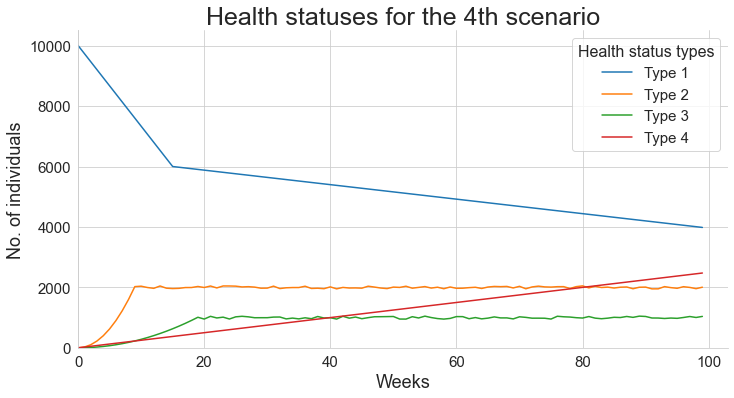

In [4]:
sns.set_style("whitegrid")
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

ax = sns.relplot(data=melted,x="no", y="value", kind='line', hue='type',legend=None,
                height=5,aspect=2)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('No. of individuals', fontsize=18)
plt.ylim(0,None)
plt.xlim(0,103)
plt.title("Health statuses for the 4th scenario",size=25)
legend = plt.legend(["Type 1","Type 2","Type 3","Type 4"], title="Health status types",prop={'size': 15})
legend.get_title().set_fontsize('16')
plt.show()